In [14]:
from nilearn import surface
from scipy import stats

import matplotlib.pyplot as plt
import nilearn
import numpy as np
import os
import pandas as pd
import seaborn as sns

# Preprocessing

Please contact the corresponding author, Sungshin Kim (sungshinkim@hanyang.ac.kr), or the first author, Junghyun Kim (juhng62@gmail.com) to get raw data.

In [15]:
label_dir = '../label/sensorimotor'
index_dir = '../index'

subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')
label_list = list(range(2, 30))
cond_list = ['CF', 'BF']

In [16]:
# df_fig2C = pd.DataFrame()

# subj_col = [subj for subj in subj_list for _ in range(1, 57)]
# df_fig2C['subj'] = subj_col

# label_col = [label for label in range(2, 30) for _ in range(2)] * 24
# df_fig2C['label'] = label_col

# cond_col = ['CF', 'BF'] * 28 * 24
# df_fig2C['cond'] = cond_col

# # df_fig2C

In [17]:
# beta_col = []

# for subj in subj_list:
#     beta_dir = f'/Users/clmn/Desktop/GL_FS/GLFS02/{subj}/main/GLanalysis02.lh'
    
#     for l in label_list:
#         label = nilearn.surface.load_surf_data(os.path.join(label_dir, f'lh.loc_th4_x_{l:02}.label'))
        
#         for cond in cond_list:
#             if cond == 'CF':
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 0]
#             else :
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 1]
            
#             beta_sum = 0
            
#             for i in label:
#                 beta_sum += beta[i]
            
#             beta_col.append(beta_sum/len(label))

# # print(len(beta_col))

# df_fig2C['beta'] = beta_col
# # df_fig2C

In [18]:
# df_fig2C.to_csv('../data/beta_sensorimotor_searchlight.csv', index=False)

In [19]:
df_fig2C = pd.read_csv('../data/beta_sensorimotor_searchlight.csv')
df_fig2C

,subj,label,cond,beta
0,GL03,2,CF,1.578697
1,GL03,2,BF,1.337314
2,GL03,3,CF,1.616027
3,GL03,3,BF,1.075988
4,GL03,4,CF,2.908137
...,...,...,...,...
1339,GL29,27,BF,2.095357
1340,GL29,28,CF,1.619787
1341,GL29,28,BF,1.395771
1342,GL29,29,CF,1.314123


# Figure 2 C

## Graph

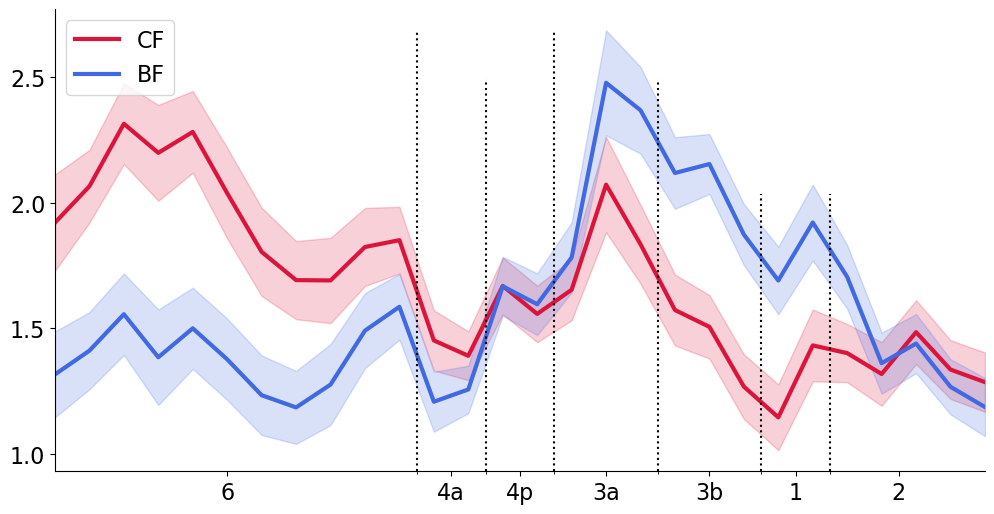

In [20]:
plt.figure(figsize=(12,6))

minor = [0, 9, 21, 34, 45]
major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]

df_fig2C_copy = df_fig2C.copy()
# df_fig2C_copy['label'] = df_fig2C_copy['label'] + 1

ax = sns.lineplot(
    data=df_fig2C_copy, x='label', y='beta', hue='cond', style='cond', 
    err_style='band', errorbar=("se", 1), 
    dashes=False, palette=['crimson', 'royalblue'], linewidth=3
)

legend = ax.legend(fontsize=16, loc='upper left')  # This moves the legend to the top left
for text, new in zip(legend.texts, ['CF', 'BF']):  # Update legend text as before
    text.set_text(new)
    
ax.set(xlim=(2,27))

# ax.set_xlabel('Brodmann area (BA)', fontsize=18)
# ax.set_ylabel('Activation (a.u.)', fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.axvline(x=12.5, ymax=0.95, color='black', linestyle=':') # BA6 - 4a
ax.axvline(x=14.5, ymax=0.85, color='black', linestyle=':') # BA4a - 4p
ax.axvline(x=16.5, ymax=0.95, color='black', linestyle=':') # BA4p - 3a
ax.axvline(x=19.5, ymax=0.85, color='black', linestyle=':') # BA3a - 3b
ax.axvline(x=22.5, ymax=0.6, color='black', linestyle=':') # BA3b - 1
ax.axvline(x=24.5, ymax=0.6, color='black', linestyle=':') # BA1 - 2

minor = [2, 13, 15, 17, 20, 23, 25, 29]
minor = [x - 0.5 for x in minor]
major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]
# major = [x + 1 for x in major]
ax.set_xticks(minor[:len(minor)-1], minor=True)
ax.set_xticks(major, minor=False)
ax.set_xticklabels(['6', '4a', '4p', '3a', '3b', '1', '2'], minor=False)
new_xlim = (df_fig2C['label'].min(), df_fig2C['label'].max())
ax.set_xlim(new_xlim)
plt.yticks(np.arange(1, 2.76, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# ax.text((13+17)*.5-6, 2.55, 'PMd', ha='center', color='k', fontsize=16)
# ax.text((13+17)*.5, 2.55, 'M1', ha='center', color='k', fontsize=16)
# ax.text((13+17)*.5+6, 2.55, 'S1', ha='center', color='k', fontsize=16)

# fname = '../figures/fig2C.png'
# plt.savefig(fname, dpi=600)
# plt.close()

### With individual data points

In [23]:
plt.figure(figsize=(12,6))

minor = [0, 9, 21, 34, 45]
major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]

df_fig2C_copy = df_fig2C.copy()
# df_fig2C_copy['label'] = df_fig2C_copy['label'] + 1

ax = sns.lineplot(
    data=df_fig2C_copy, x='label', y='beta', hue='cond', style='cond', 
    err_style='band', errorbar=("se", 1), 
    dashes=False, palette=['crimson', 'royalblue'], linewidth=3
)

sns.stripplot(
    data=df_fig2C_copy, x='label', y='beta', hue='cond', 
    dodge=False, palette=['crimson', 'royalblue'],
    size=3, 
    jitter=True, 
    alpha=0.5, 
    marker='o', 
    edgecolor='auto', 
    linewidth=0.5, 
    ax=ax, legend=False
)

legend = ax.legend(fontsize=16, loc='upper left')  # This moves the legend to the top left
for text, new in zip(legend.texts, ['CF', 'BF']):  # Update legend text as before
    text.set_text(new)
    
ax.set(xlim=(2,27))

# ax.set_xlabel('Brodmann area (BA)', fontsize=18)
# ax.set_ylabel('Activation (a.u.)', fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.axvline(x=12.5, ymax=0.95, color='black', linestyle=':') # BA6 - 4a
ax.axvline(x=14.5, ymax=0.85, color='black', linestyle=':') # BA4a - 4p
ax.axvline(x=16.5, ymax=0.95, color='black', linestyle=':') # BA4p - 3a
ax.axvline(x=19.5, ymax=0.85, color='black', linestyle=':') # BA3a - 3b
ax.axvline(x=22.5, ymax=0.6, color='black', linestyle=':') # BA3b - 1
ax.axvline(x=24.5, ymax=0.6, color='black', linestyle=':') # BA1 - 2

minor = [2, 13, 15, 17, 20, 23, 25, 29]
minor = [x - 0.5 for x in minor]
major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]
# major = [x + 1 for x in major]
ax.set_xticks(minor[:len(minor)-1], minor=True)
ax.set_xticks(major, minor=False)
ax.set_xticklabels(['6', '4a', '4p', '3a', '3b', '1', '2'], minor=False)
new_xlim = (df_fig2C['label'].min(), df_fig2C['label'].max())
ax.set_xlim(new_xlim)
# plt.yticks(np.arange(1, 2.76, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# ax.text((13+17)*.5-6, 2.55, 'PMd', ha='center', color='k', fontsize=16)
# ax.text((13+17)*.5, 2.55, 'M1', ha='center', color='k', fontsize=16)
# ax.text((13+17)*.5+6, 2.55, 'S1', ha='center', color='k', fontsize=16)

fname = '../figures/fig2C.png'
plt.savefig(fname, dpi=600)
plt.close()

## Statistics
Beta difference between the conditions in Brodmann areas

### Preprocessing

In [8]:
# label_dir = '../label/sensorimotor'
# index_dir = '../index'

# subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')
# label_list = ['6', '4a', '4p', '3a', '3b', '1', '2']
# cond_list = ['CF', 'BF']

In [9]:
# df_BA = pd.DataFrame()

# subj_col = [subj for subj in subj_list for _ in range(1, len(label_list)*len(cond_list)+1)]
# df_BA['subj'] = subj_col

# label_col = [label for label in label_list for _ in range(len(cond_list))] * len(subj_list)
# df_BA['label'] = label_col

# cond_col = ['CF', 'BF'] * len(label_list) * len(subj_list)
# df_BA['cond'] = cond_col

# # df_BA

In [10]:
# beta_col = []

# for subj in subj_list:
#     beta_dir = beta_dir = f'/Users/clmn/Desktop/GL_FS/GLFS02/{subj}/main/GLanalysis02.lh'
    
#     for l in label_list:
#         label = nilearn.surface.load_surf_data(os.path.join(label_dir, f'lh.loc_th4_x_BA{l}.label'))
        
#         for cond in cond_list:
#             if cond == 'CF':
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 0]
#             else :
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 1]
            
#             beta_sum = 0
            
#             for i in label:
#                 beta_sum += beta[i]
            
#             beta_col.append(beta_sum/len(label))

# # print(len(beta_col))

# df_BA['beta'] = beta_col
# df_BA

In [11]:
# df_BA.to_csv('../data/beta_sensorimotor_BA.csv', index=False)

In [12]:
df_BA = pd.read_csv('../data/beta_sensorimotor_BA.csv')
df_BA

,subj,label,cond,beta
0,GL03,6,CF,1.885944
1,GL03,6,BF,1.478514
2,GL03,4a,CF,1.676896
3,GL03,4a,BF,1.409214
4,GL03,4p,CF,2.165096
...,...,...,...,...
331,GL29,3b,BF,2.572703
332,GL29,1,CF,1.938873
333,GL29,1,BF,2.162373
334,GL29,2,CF,1.623231


### Calculation

In [13]:
# for i in range(2, 30):
#     a = df_fig2C[(df_fig2C["cond"] == 'CF') & (df_fig2C["label"] == i)].groupby('subj')['beta'].mean()
#     b = df_fig2C[(df_fig2C["cond"] == 'BF') & (df_fig2C["label"] == i)].groupby('subj')['beta'].mean()
#     print(i, ':', stats.ttest_rel(a, b)[1]*28)

In [14]:
label_list = ['6', '4a', '4p', '3a', '3b', '1', '2']

for label in label_list:
    a = df_BA[(df_BA["cond"] == 'CF') & (df_BA["label"] == label)].groupby('subj')['beta'].mean()
    b = df_BA[(df_BA["cond"] == 'BF') & (df_BA["label"] == label)].groupby('subj')['beta'].mean()
    print(label, ':', stats.ttest_rel(a, b), stats.ttest_rel(a, b)[1]*7)

6 : TtestResult(statistic=10.319782651195446, pvalue=4.2071273046278113e-10, df=23) 2.944989113239468e-09
4a : TtestResult(statistic=5.832711542073361, pvalue=6.066263034853096e-06, df=23) 4.2463841243971676e-05
4p : TtestResult(statistic=-0.5363218510560499, pvalue=0.5968858094942024, df=23) 4.178200666459417
3a : TtestResult(statistic=-6.886036901803792, pvalue=5.077965783246342e-07, df=23) 3.554576048272439e-06
3b : TtestResult(statistic=-12.21104830491149, pvalue=1.559453749870368e-11, df=23) 1.0916176249092576e-10
1 : TtestResult(statistic=-10.428870374709872, pvalue=3.441253679652214e-10, df=23) 2.40887757575655e-09
2 : TtestResult(statistic=-0.9590899161158133, pvalue=0.3474878600108181, df=23) 2.4324150200757266
